In [1]:
from collections import defaultdict
import graphviz
from heapq import heappush, heappop

## Undirected Unweighted Graph

In [2]:
def undirected_unweighted(lines):
    V = set()
    E = defaultdict(set)

    for line in lines.splitlines():
        u, v = line.strip().split(",")

        V.add(u); V.add(v)
        E[u].add(v); E[v].add(u)
    
    return V, E

def draw_undirected_unweighted(G):
    V, E = G
    dot = graphviz.Graph()
    dot.attr(rankdir='LR')
    seen_edges = set()

    for v in E[u]:
        if (v, u) in seen_edges:
            continue
        seen_edges.add((u, v))
        dot.edge(u, v)
    
    return graphviz.Source(dot.source)
    #dot.render('graph', format='svg')

## Directed Unweighted Graph

In [3]:
def directed_unweighted(lines):
    V = set()
    E = defaultdict(set)

    for line in lines.splitlines():
        u, v = line.strip().split(",")
        V.add(u); V.add(v)
        E[u].add(v)
    
    return V, E

def draw_directed_unweighted(G):
    V, E = G
    dot = graphviz.Digraph()
    dot.attr(rankdir='LR')
    
    for u in V:
        dot.node(u)
        for v in E[u]:
            dot.edge(u, v)
    
    return graphviz.Source(dot.source)
    #dot.render('graph', format='svg')

## Undirected Weighted Graph

In [4]:
def undirected_weighted(lines):
    V = set()
    E = defaultdict(set)
    weights = {}

    for line in lines.splitlines():
        u, v, w = line.strip().split(",")
        V.add(u); V.add(v)
        E[u].add(v); E[v].add(u)
        
        w = int(w)
        weights[(u, v)] = w; weights[(v, u)] = w;
    
    return V, E, weights

def draw_undirected_weighted(G):
    V, E, w = G
    dot = graphviz.Graph()
    dot.attr(rankdir='RL')
    seen_edges = set()

    for u in V:
        dot.node(u)
        for v in E[u]:
            if (v, u) in seen_edges:
                continue
            seen_edges.add((u, v))
            dot.edge(u, v, label=str(w[(u, v)]))
    
    return graphviz.Source(dot.source)
    #dot.render('graph', format='svg')

## Directed Weighted Graph

In [5]:
def directed_weighted(lines):
    V = set()
    E = defaultdict(set)
    weights = {}

    for line in lines.splitlines():
        u, v, w = line.strip().split(",")
        V.add(u); V.add(v)
        E[u].add(v)
        weights[(u, v)] = int(w)
    
    return V, E, weights

def draw_directed_weighted(G):
    V, E, w = G
    dot = graphviz.Digraph()
    dot.attr(rankdir='LR')

    for u in V:
        dot.node(u)
        for v in E[u]:
            dot.edge(u, v, label=str(w[(u, v)]))

    return graphviz.Source(dot.source)
    #dot.render('graph', format='svg')

## Depth First Search

In [6]:
def DFSVisit(G, u, visited=set(), stack=None):
    V, E = G
    visited.add(u)
    
    for v in E[u]:
        if v not in visited:
            DFSVisit(G, v, visited, stack)
    
    if stack is not None:
        stack.append(u)
    
    return visited

def DFSFull(G):
    V, E = G
    visited = set()
    
    for v in V:
        if v not in visited:
            DFSVisit(G, v, visited)
    
    return visited

## Breadth First Search

## Topological Sorting with DFS

In [7]:
def DFSTopSort(G):
    stack = []
    visited = set()
    V, E = G
    
    for u in V:
        if u not in visited:
            DFSVisit(G, u, visited, stack)
    
    return stack

## Dijkstra: Shortest paths

In [8]:
def Dijkstra(G, s):
    V, E, w = G
    dist = defaultdict(lambda: float("inf"))
    dist[s] = 0
    queue = [(0, s)]

    while queue:
        cost, u = heappop(queue)
        if cost != dist[u]: 
            print(u + " already has a shorter distance to it from " + s + ". Cost: " + str(cost))
            continue
        for v in E[u]:
            c = dist[u] + w[(u, v)]
            if c < dist[v]:
                dist[v] = c
                print(v + " are pushed onto the queue as neighbour of " + u + " with c = " + str(c))
                heappush(queue, (c, v))
    
    return dist

## Bellman-Ford: Shortest paths

In [15]:
def BellmanFord(G, s):
    V, E, w = G
    dist = defaultdict(lambda: float("inf"))
    dist[s] = 0
    
    for i in range(len(V)-1):
        for u, v in w:
            c = dist[u] + w[(u, v)]
            if c < dist[v]:
                dist[v] = c

    for u, v in w:
        c = dist[u] + w[(u, v)]
        if c < dist[v]:
            raise ValueError("Invalid argument: The graph has a negative cycle.")
    
    return dist

## Prim: Minimal Spanning Trees

In [10]:
def Prim(G):
    V, E, w = G
    s = next(iter(V)) #Arbitrary start vertex
    queue = [(0, None, s)]
    parents = {}

    while queue:
        _, p, u = heappop(queue)
        if u in parents: continue
        parents[u] = p
        for v in E[u]:
            heappush(queue, (w[(u, v)], u, v))
    return parents

## Test program

Undirected weighted:
V: {'B', 'E', 'A', 'D', 'C'}

E: {('A', 'B'): 2, ('B', 'A'): 2, ('B', 'C'): 3, ('C', 'B'): 3, ('C', 'D'): 1, ('D', 'C'): 1, ('C', 'E'): 4, ('E', 'C'): 4, ('A', 'D'): 7, ('D', 'A'): 7, ('A', 'E'): 10, ('E', 'A'): 10, ('B', 'D'): 9, ('D', 'B'): 9, ('B', 'E'): 12, ('E', 'B'): 12}
B are pushed onto the queue as neighbour of A with c = 2
D are pushed onto the queue as neighbour of A with c = 7
E are pushed onto the queue as neighbour of A with c = 10
C are pushed onto the queue as neighbour of B with c = 5
D are pushed onto the queue as neighbour of C with c = 6
E are pushed onto the queue as neighbour of C with c = 9
D already has a shorter distance to it from A. Cost: 7
E already has a shorter distance to it from A. Cost: 10

Dijkstra:
{'A': 0, 'B': 2, 'D': 6, 'E': 9, 'C': 5}

Bellman Ford:
{'A': 0, 'B': 2, 'C': 5, 'D': 6, 'E': 9}

Prim:
{'B': None, 'A': 'B', 'C': 'B', 'D': 'C', 'E': 'C'}



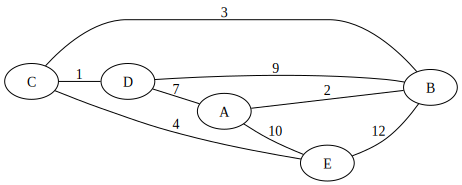

In [17]:
lines = "A,B,2 \n B,C,3 \n C,D,1 \n C,E,4 \n A,D,7 \n A,E,10 \n B,D,9 \n B,E,12"
#lines = "A,B,2 \n B,C,3 \n C,A,-6 \n C,D,1 \n D,E,4"
G = undirected_weighted(lines)
print("Undirected weighted:" + "\nV: " + str(G[0]) + "\n\nE: " + str(G[2]))

dist_dijkstra = Dijkstra(G, "A")
dist_bellman = BellmanFord(G, "A")
prim = Prim(G)
print("\nDijkstra:\n" + str(dict(dist_dijkstra)) + "\n")
print("Bellman Ford:\n" + str(dict(dist_bellman)) + "\n")
print("Prim:\n" + str(prim) + "\n")

draw_undirected_weighted(G)